In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/lenos16/CAS-ADS-Module-2/main/carprice.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
df.drop(['car_ID'], axis=1, inplace=True)
df[['CarBrand','CarModel']] = df["CarName"].str.split(" ", 1, expand=True)
df.drop('CarName', axis=1, inplace=True)
df.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarBrand,CarModel
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,giulia
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,stelvio
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,Quadrifoglio
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,100 ls
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,100ls


In [5]:
df['CarBrand'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [6]:
df['CarBrand'] = df['CarBrand'].replace({'maxda': 'mazda', 'nissan': 'Nissan', 'porcshce': 'porsche', 'toyouta': 'toyota',
                                         'vokswagen': 'volkswagen', 'vw': 'volkswagen'})

In [7]:
df.drop(['symboling'], axis=1, inplace=True)


In [8]:
# import all libraries and dependencies for data visualization
pd.options.display.float_format='{:.4f}'.format
plt.rcParams['figure.figsize'] = [8,8]
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', -1)
sns.set(style='darkgrid')
import matplotlib.ticker as ticker
import matplotlib.ticker as plticker

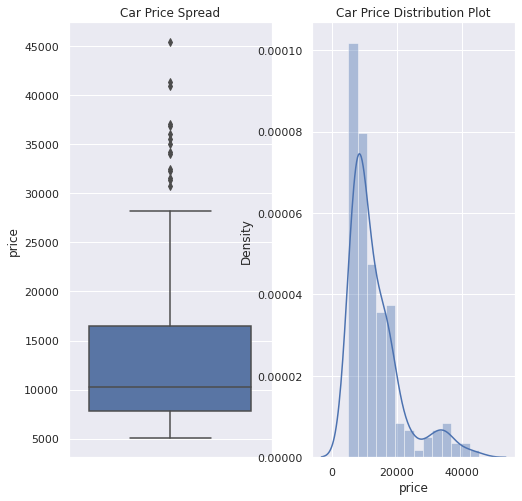

In [9]:
plt.subplot(1,2,1)
plt.title("Car Price Spread")
sns.boxplot(y=df['price'])

plt.subplot(1,2,2)
plt.title("Car Price Distribution Plot")
sns.distplot(df['price'])

[Text(0.5, 0, 'wheelbase'),
 Text(1.5, 0, 'carlength'),
 Text(2.5, 0, 'carwidth'),
 Text(3.5, 0, 'carheight'),
 Text(4.5, 0, 'curbweight'),
 Text(5.5, 0, 'enginesize'),
 Text(6.5, 0, 'boreratio'),
 Text(7.5, 0, 'stroke'),
 Text(8.5, 0, 'compressionratio'),
 Text(9.5, 0, 'horsepower'),
 Text(10.5, 0, 'peakrpm'),
 Text(11.5, 0, 'citympg'),
 Text(12.5, 0, 'highwaympg'),
 Text(13.5, 0, 'price')]

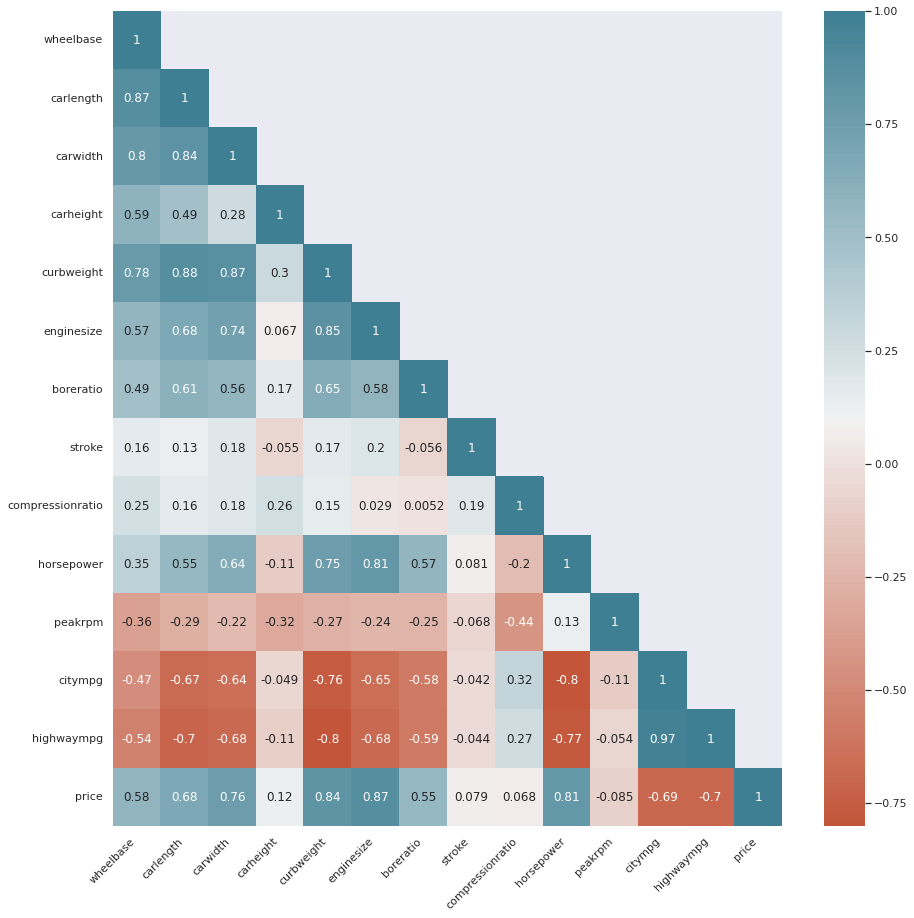

In [10]:
#Correlation
corr=df.corr()
plt.figure(figsize=(15,15))
ax=sns.heatmap(df.corr(), cmap=sns.diverging_palette(20, 220, n=200), annot=True, mask=np.triu(df.corr(),k=1))
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

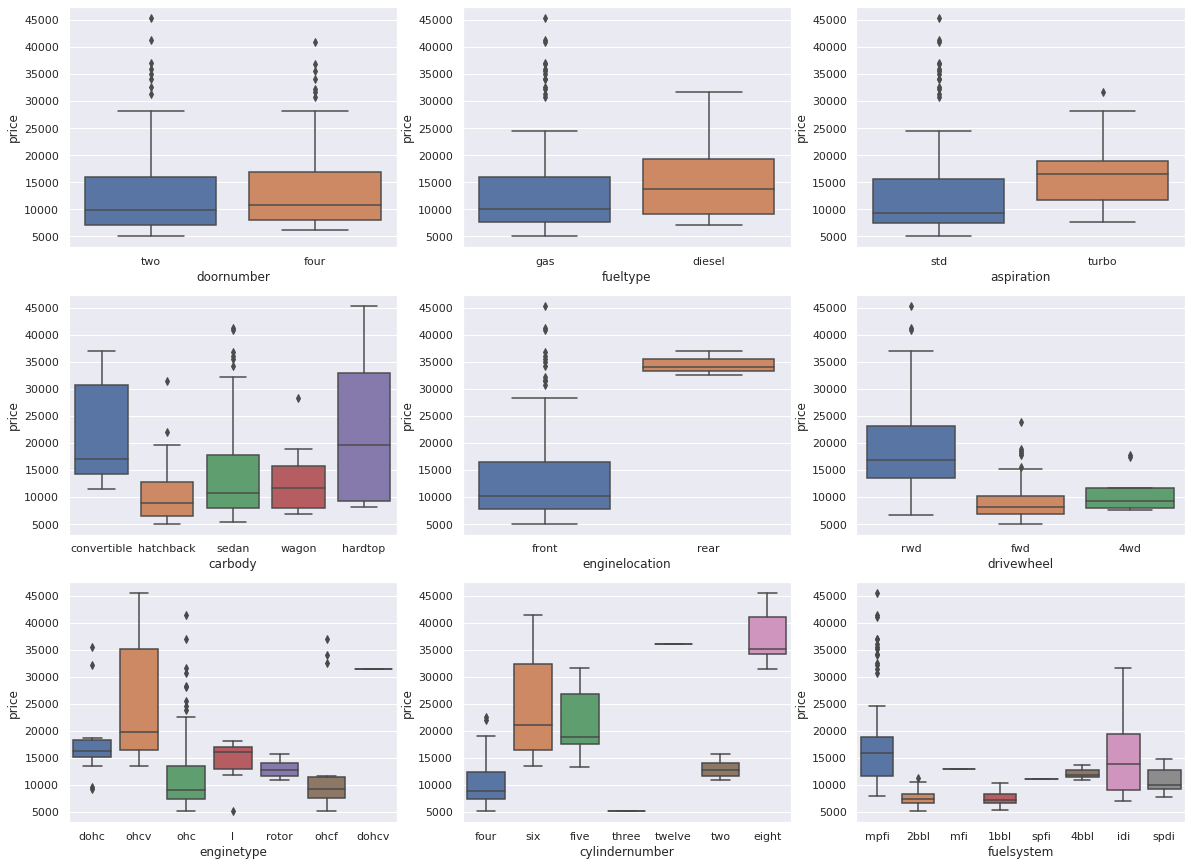

In [11]:
plt.figure(figsize=(20, 15))
plt.subplot(3,3,1)
sns.boxplot(x = 'doornumber', y = 'price', data = df)
plt.subplot(3,3,2)
sns.boxplot(x = 'fueltype', y = 'price', data = df)
plt.subplot(3,3,3)
sns.boxplot(x = 'aspiration', y = 'price', data = df)
plt.subplot(3,3,4)
sns.boxplot(x = 'carbody', y = 'price', data = df)
plt.subplot(3,3,5)
sns.boxplot(x = 'enginelocation', y = 'price', data = df)
plt.subplot(3,3,6)
sns.boxplot(x = 'drivewheel', y = 'price', data = df)
plt.subplot(3,3,7)
sns.boxplot(x = 'enginetype', y = 'price', data = df)
plt.subplot(3,3,8)
sns.boxplot(x = 'cylindernumber', y = 'price', data = df)
plt.subplot(3,3,9)
sns.boxplot(x = 'fuelsystem', y = 'price', data = df)
plt.show()

[Text(0, 0.5, 'Frequency of Car Body'), Text(0.5, 0, 'Car Body')]

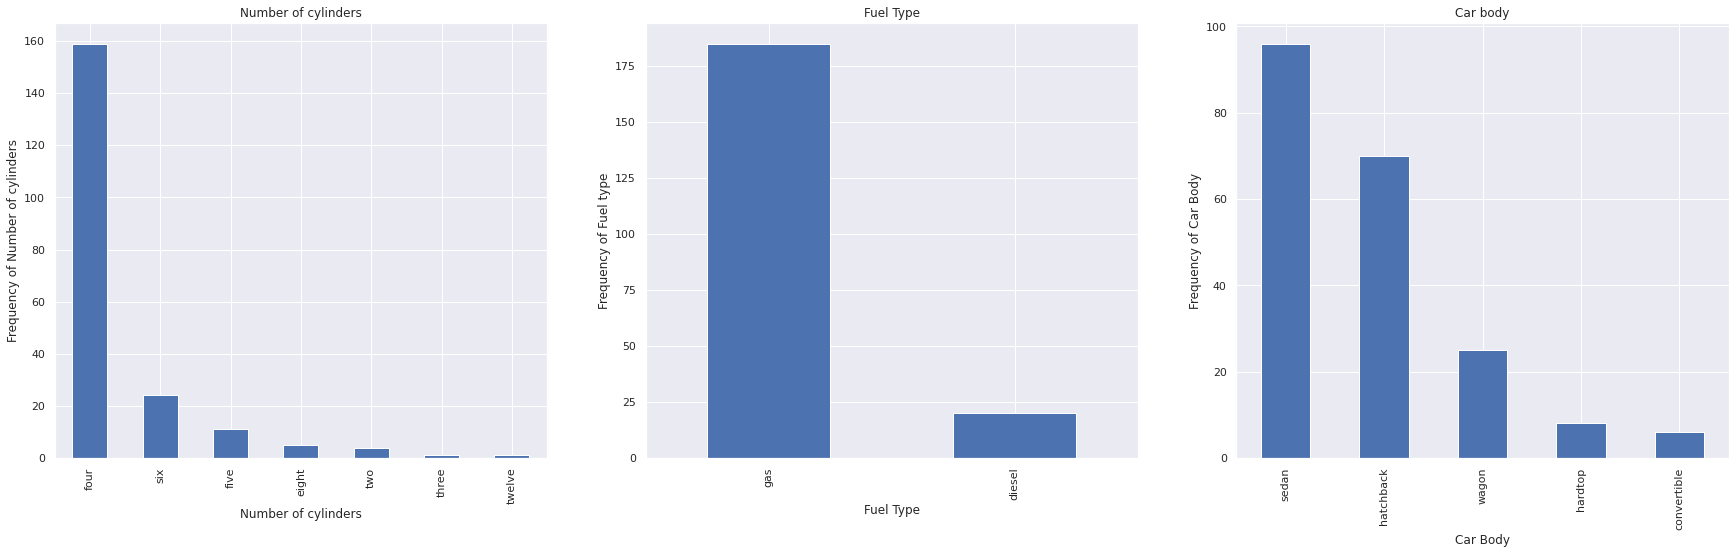

In [12]:
plt.figure(figsize=(30, 8))

plt.subplot(1,3,1)
plt1 = df['cylindernumber'].value_counts().plot(kind='bar')
plt.title('Number of cylinders')
plt1.set(xlabel = 'Number of cylinders', ylabel='Frequency of Number of cylinders')

plt.subplot(1,3,2)
plt1 = df['fueltype'].value_counts().plot(kind='bar')
plt.title('Fuel Type')
plt1.set(xlabel = 'Fuel Type', ylabel='Frequency of Fuel type')

plt.subplot(1,3,3)
plt1 = df['carbody'].value_counts().plot(kind='bar')
plt.title('Car body')
plt1.set(xlabel = 'Car Body', ylabel='Frequency of Car Body')

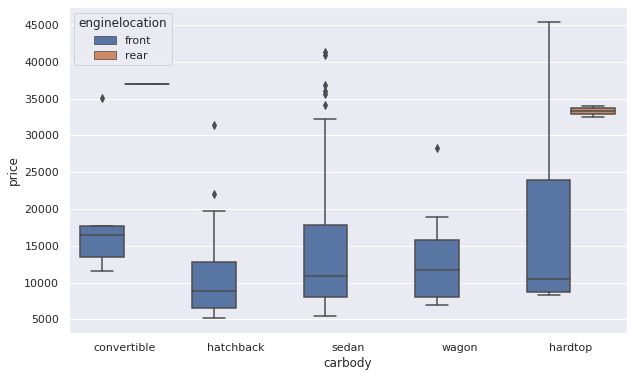

In [13]:
#Relationship between cylindernumber vs price with hue fueltype
plt.figure(figsize = (10, 6))
sns.boxplot(x = 'carbody', y = 'price', hue = 'enginelocation', data = df)
plt.show()

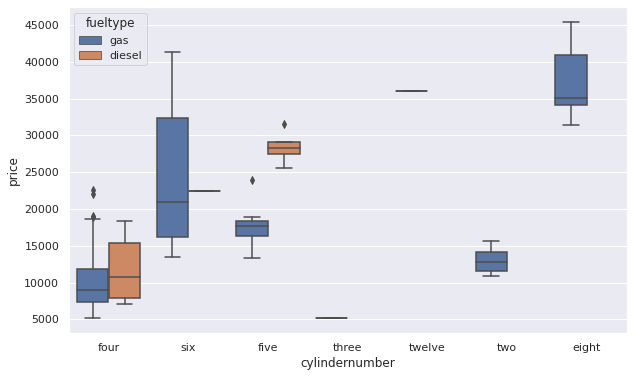

In [14]:
#Relationship between cylindernumber vs price with hue fueltype
plt.figure(figsize = (10, 6))
sns.boxplot(x = 'cylindernumber', y = 'price', hue = 'fueltype', data = df)
plt.show()

In [15]:
df.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarBrand,CarModel
0,gas,std,two,convertible,rwd,front,88.6000,168.8000,64.1000,48.8000,2548,dohc,four,130,mpfi,3.4700,2.6800,9.0000,111,5000,21,27,13495.0000,alfa-romero,giulia
1,gas,std,two,convertible,rwd,front,88.6000,168.8000,64.1000,48.8000,2548,dohc,four,130,mpfi,3.4700,2.6800,9.0000,111,5000,21,27,16500.0000,alfa-romero,stelvio
2,gas,std,two,hatchback,rwd,front,94.5000,171.2000,65.5000,52.4000,2823,ohcv,six,152,mpfi,2.6800,3.4700,9.0000,154,5000,19,26,16500.0000,alfa-romero,Quadrifoglio
3,gas,std,four,sedan,fwd,front,99.8000,176.6000,66.2000,54.3000,2337,ohc,four,109,mpfi,3.1900,3.4000,10.0000,102,5500,24,30,13950.0000,audi,100 ls
4,gas,std,four,sedan,4wd,front,99.4000,176.6000,66.4000,54.3000,2824,ohc,five,136,mpfi,3.1900,3.4000,8.0000,115,5500,18,22,17450.0000,audi,100ls


In [16]:
cat_col=['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem', 'CarBrand']
df.drop('CarModel', axis=1, inplace=True)

In [17]:
dummies=pd.get_dummies(df[cat_col])
dummies.shape

(205, 60)

In [18]:
df_auto=pd.concat([df, dummies], axis=1)
df_auto.drop(cat_col, axis=1, inplace=True)
df_auto.shape

(205, 74)

In [19]:
# import all libraries and dependencies for machine learning

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.base import TransformerMixin
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

In [20]:
df_auto.head(5)

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginelocation_front,enginelocation_rear,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,CarBrand_Nissan,CarBrand_alfa-romero,CarBrand_audi,CarBrand_bmw,CarBrand_buick,CarBrand_chevrolet,CarBrand_dodge,CarBrand_honda,CarBrand_isuzu,CarBrand_jaguar,CarBrand_mazda,CarBrand_mercury,CarBrand_mitsubishi,CarBrand_peugeot,CarBrand_plymouth,CarBrand_porsche,CarBrand_renault,CarBrand_saab,CarBrand_subaru,CarBrand_toyota,CarBrand_volkswagen,CarBrand_volvo
0,88.6000,168.8000,64.1000,48.8000,2548,130,3.4700,2.6800,9.0000,111,5000,21,27,13495.0000,0,1,1,0,0,1,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,88.6000,168.8000,64.1000,48.8000,2548,130,3.4700,2.6800,9.0000,111,5000,21,27,16500.0000,0,1,1,0,0,1,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,94.5000,171.2000,65.5000,52.4000,2823,152,2.6800,3.4700,9.0000,154,5000,19,26,16500.0000,0,1,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,99.8000,176.6000,66.2000,54.3000,2337,109,3.1900,3.4000,10.0000,102,5500,24,30,13950.0000,0,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,99.4000,176.6000,66.4000,54.3000,2824,136,3.1900,3.4000,8.0000,115,5500,18,22,17450.0000,0,1,1,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [21]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
# We divide the df into 70/30 ratio
df_train, df_test = train_test_split(df_auto, train_size = 0.7, test_size = 0.3, random_state = 100)

df_train.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginelocation_front,enginelocation_rear,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,CarBrand_Nissan,CarBrand_alfa-romero,CarBrand_audi,CarBrand_bmw,CarBrand_buick,CarBrand_chevrolet,CarBrand_dodge,CarBrand_honda,CarBrand_isuzu,CarBrand_jaguar,CarBrand_mazda,CarBrand_mercury,CarBrand_mitsubishi,CarBrand_peugeot,CarBrand_plymouth,CarBrand_porsche,CarBrand_renault,CarBrand_saab,CarBrand_subaru,CarBrand_toyota,CarBrand_volkswagen,CarBrand_volvo
122,93.7000,167.3000,63.8000,50.8000,2191,98,2.9700,3.2300,9.4000,68,5500,31,38,7609.0000,0,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
125,94.5000,168.9000,68.3000,50.2000,2778,151,3.9400,3.1100,9.5000,143,5500,19,27,22018.0000,0,1,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
166,94.5000,168.7000,64.0000,52.6000,2300,98,3.2400,3.0800,9.4000,112,6600,26,29,9538.0000,0,1,1,0,0,1,0,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,88.6000,168.8000,64.1000,48.8000,2548,130,3.4700,2.6800,9.0000,111,5000,21,27,16500.0000,0,1,1,0,0,1,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
199,104.3000,188.8000,67.2000,57.5000,3157,130,3.6200,3.1500,7.5000,162,5100,17,22,18950.0000,0,1,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [22]:
scaler = preprocessing.StandardScaler()
num_col=['wheelbase','carlength','carwidth', 'carheight','curbweight','enginesize','boreratio', 'stroke', 'compressionratio','horsepower', 'peakrpm','citympg','highwaympg','price']
df_train[num_col] = scaler.fit_transform(df_train[num_col])
df_train.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginelocation_front,enginelocation_rear,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,CarBrand_Nissan,CarBrand_alfa-romero,CarBrand_audi,CarBrand_bmw,CarBrand_buick,CarBrand_chevrolet,CarBrand_dodge,CarBrand_honda,CarBrand_isuzu,CarBrand_jaguar,CarBrand_mazda,CarBrand_mercury,CarBrand_mitsubishi,CarBrand_peugeot,CarBrand_plymouth,CarBrand_porsche,CarBrand_renault,CarBrand_saab,CarBrand_subaru,CarBrand_toyota,CarBrand_volkswagen,CarBrand_volvo
122,-0.8118,-0.4872,-0.9245,-1.1346,-0.6421,-0.6602,-1.2973,-0.0644,-0.1726,-0.8729,0.7713,0.8398,1.0254,-0.7002,0,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
125,-0.6772,-0.3598,1.1150,-1.3820,0.4394,0.6378,2.4323,-0.4498,-0.1461,1.0218,0.7713,-0.9570,-0.5575,1.1519,0,1,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
166,-0.6772,-0.3757,-0.8339,-0.3924,-0.4413,-0.6602,-0.2592,-0.5461,-0.1726,0.2387,3.0650,0.0911,-0.2697,-0.4522,0,1,1,0,0,1,0,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,-1.6703,-0.3678,-0.7885,-1.9593,0.0156,0.1235,0.6251,-1.8305,-0.2783,0.2134,-0.2712,-0.6576,-0.5575,0.4426,0,1,1,0,0,1,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
199,0.9724,1.2254,0.6164,1.6280,1.1377,0.1235,1.2019,-0.3213,-0.6750,1.5018,-0.0627,-1.2565,-1.2770,0.7576,0,1,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [23]:
y_train = df_train.pop('price')
X_train = df_train

In [24]:
X_train.columns

Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'fueltype_diesel', 'fueltype_gas',
       'aspiration_std', 'aspiration_turbo', 'doornumber_four',
       'doornumber_two', 'carbody_convertible', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_4wd',
       'drivewheel_fwd', 'drivewheel_rwd', 'enginelocation_front',
       'enginelocation_rear', 'enginetype_dohc', 'enginetype_dohcv',
       'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_eight', 'cylindernumber_five',
       'cylindernumber_four', 'cylindernumber_six', 'cylindernumber_three',
       'cylindernumber_twelve', 'cylindernumber_two', 'fuelsystem_1bbl',
       'fuelsystem_2bbl', 'fuelsystem_4bbl', 'fuelsystem_idi',
       'fuelsystem_mfi', 'fuelsystem_mpfi', 'fuelsystem_spdi

## Test regression with all Variables

In [25]:
# Now lets look at the regression
# Adding a constant variable and Build a first fitted model
X_train_c = sm.add_constant(X_train)
lm_train_orig = sm.OLS(y_train,X_train).fit()

#Summary of linear model
print(lm_train_orig.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     59.26
Date:                Fri, 31 Dec 2021   Prob (F-statistic):           1.87e-50
Time:                        01:15:34   Log-Likelihood:                 60.109
No. Observations:                 143   AIC:                            -6.217
Df Residuals:                      86   BIC:                             162.7
Df Model:                          56                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
wheelbase                 0.23

Now the result does not look too bad, however we have an extremely large amount of variables. Let's see if we can reduce them through the RFE function 

In [26]:
# Running RFE with the output number of the variable equal to 20
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_feature_to_select=20)
rfe = rfe.fit(X_train, y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

TypeError: ignored

In [ ]:
# Selecting the variables which are in support

col_sup = X_train.columns[rfe.support_]
col_sup

In [ ]:
#Creating X_train dataframe with RFE selected variables

X_train_rfe = X_train[col_sup]

In [ ]:
# Now lets look at the regression
# Adding a constant variable and Build a fitted model
X_train_rfec = sm.add_constant(X_train_rfe)
lm_rfe = sm.OLS(y_train,X_train_rfec).fit()

#Summary of linear model
print(lm_rfe.summary())

In [ ]:
X_train_rfe1 = X_train_rfe.drop(['enginetype_dohcv'], 1,)
X_train_rfe1.head()

In [ ]:
# Adding a constant variable and Build a second fitted model

X_train_rfe1c = sm.add_constant(X_train_rfe1)
lm_rfe1 = sm.OLS(y_train, X_train_rfe1c).fit()

#Summary of linear model
print(lm_rfe1.summary())

In [ ]:
X_train_rfe2 = X_train_rfe1.drop(['cylindernumber_eight'], 1,)
# Adding a constant variable and Build a third fitted model

X_train_rfe2c = sm.add_constant(X_train_rfe2)
lm_rfe2 = sm.OLS(y_train, X_train_rfe2c).fit()

#Summary of linear model
print(lm_rfe2.summary())

In [ ]:
X_train_rfe3 = X_train_rfe2.drop(['enginetype_ohcv'], 1,)
# Adding a constant variable and Build a third fitted model

X_train_rfe3c = sm.add_constant(X_train_rfe3)
lm_rfe3 = sm.OLS(y_train, X_train_rfe3c).fit()

#Summary of linear model
print(lm_rfe3.summary())

In [ ]:
X_train_rfe4 = X_train_rfe3.drop(['CarBrand_peugeot'], 1,)
# Adding a constant variable and Build a third fitted model

X_train_rfe4c = sm.add_constant(X_train_rfe4)
lm_rfe4 = sm.OLS(y_train, X_train_rfe4c).fit()

#Summary of linear model
print(lm_rfe4.summary())

In [ ]:
X_train_rfe5 = X_train_rfe4.drop(['enginetype_l'], 1,)
# Adding a constant variable and Build a third fitted model

X_train_rfe5c = sm.add_constant(X_train_rfe5)
lm_rfe5 = sm.OLS(y_train, X_train_rfe5c).fit()

#Summary of linear model
print(lm_rfe5.summary())

# Using the VIF to check for Multicollinearity:
* A variance inflation factor (VIF) provides a measure of multicollinearity among the independent variables in a multiple regression model
* Detecting multicollinearity is important because while multicollinearity does not reduce the explanatory power of the model, it does reduce the statistical significance of the independent variables
* A large variance inflation factor (VIF) on an independent variable indicates a highly collinear relationship to the other variables that should be considered or adjusted for in the structure of the model and selection of independent variables
* Variance inflation factors allow a quick measure of how much a variable is contributing to the standard error in the regression. When significant multicollinearity issues exist, the variance inflation factor will be very large for the variables involved
* A VIF of 1 indicates two variables are not correlated, a VIF between 1 and 5 indicates moderate correlation, and a VIF above 5 indicates high correlation.

In [ ]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe5.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe5.values, i) for i in range(X_train_rfe5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

We can see that enginetype_rotor and cylindernumber_two have extreme high VIF factors

In [ ]:
X_train_rfe6 = X_train_rfe5.drop(['enginetype_rotor'], 1,)
# Adding a constant variable and Build a third fitted model

X_train_rfe6c = sm.add_constant(X_train_rfe6)
lm_rfe6 = sm.OLS(y_train, X_train_rfe6c).fit()

#Summary of linear model
print(lm_rfe6.summary())

See that dropping enginetype_rotor did not change the R-Squared value? Let's look at the VIF factors again

In [ ]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe6.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe6.values, i) for i in range(X_train_rfe6.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Dropping enginetype_rotor also changed the VIF score for cylindernumber_two we now have no Variable where the VIF is larger than 5!

Now compared to our original model we only dropped the R2 score by 0.045 but significantly improved the F-statistic and prob(F)

## Now let's use the model to predict car prices on the test set

But first let's see if the error terms are normally distributed (one of the major assumptions for linear regression)

In [ ]:
# Predicting the price of training set.
y_train_price = lm_rfe6.predict(X_train_rfe6c)

In [ ]:
fig=sm.qqplot(y_train - y_train_price, line='s')

The error terms seems normally distributed with a few outliers at the very end of the quantile

Let's check the MSE and RMSE score for the train set

In [ ]:
from sklearn.metrics import mean_squared_error
import math
MSE_Train=mean_squared_error(y_train, y_train_price)
RMSE_Train=math.sqrt(MSE_Train)
print('MSE:\n')
print(MSE_Train)
print('RMSE:\n')
print(RMSE_Train)

## Making predictions with the model
Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final model.

In [ ]:
df_test[num_col] = scaler.transform(df_test[num_col])
df_test.shape

In [ ]:
#Dividing test set into X_test and Y_test
y_test = df_test.pop('price')
X_test = df_test

In [ ]:
# Adding constant
X_test_1 = sm.add_constant(X_test)

X_test_new = X_test_1[X_train_rfe6c.columns]

In [ ]:
# Making predictions using the final model
y_pred = lm_rfe6.predict(X_test_new)

In [ ]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test ', fontsize=18)
plt.ylabel('y_pred', fontsize=16)

## R-Squared Score of the Test set

In [ ]:
r2_score(y_test, y_pred)

No significant drop on the R-Squared score of between our prediction and real price!

## MSE and RMSE Score of the test set

In [ ]:
MSE_Test=mean_squared_error(y_test, y_pred)
RMSE_Test=math.sqrt(MSE_Test)
print('MSE_Test:\n')
print(MSE_Test)
print('\n')
print('RMSE_Test:\n')
print(RMSE_Test)
print('\n')
print('\n')
print('MSE_Train:\n')
print(MSE_Train)
print('\n')
print('RMSE_Train:\n')
print(RMSE_Train)